# Сбор и разметка данных (семинары)

## Урок 8. Работа с данными

## Задача:

Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
Загрузите датасет в pandas DataFrame под названием df.

### Выполните предварительную обработку данных, выполнив следующие шаги:

 a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 
 
 b. Проверьте и обработайте любые дублирующиеся строки в датасете. 
 
 c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

### Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:

 a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 
 
 b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 
 
 c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

### Выполните проектирование признаков путем реализации следующих преобразований:

 a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 
 
 b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [58]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Загрузка данных
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [60]:
# 1. Предварительный анализ данных
print("Размер обучающего набора:", df.shape)
print("Размер тестового набора:", df_test.shape)

Размер обучающего набора: (1460, 81)
Размер тестового набора: (1459, 80)


In [61]:
# Просмотр основной информации о данных
print("\nОсновная информация об обучающем наборе данных:")
df.info()


Основная информация об обучающем наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  Ove

In [62]:
# Просмотр основной информации о данных
print("\nОсновная информация о тестовом наборе данных:")
df_test.info()


Основная информация о тестовом наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  Overa

In [63]:
# Проверим пропущенные значения в обучающем наборе данных
missing_values_train = df.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0].sort_values(ascending=False)
print("\nПропущенные значения в обучающем наборе данных:\n", missing_values_train)


Пропущенные значения в обучающем наборе данных:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [64]:
# Проверим пропущенные значения в тестовом наборе данных
missing_values_test = df_test.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0].sort_values(ascending=False)
print("\nПропущенные значения в тестовом наборе данных:\n", missing_values_test)


Пропущенные значения в тестовом наборе данных:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [65]:
# 2. Проверка на наличие дубликатов
duplicates_train = df.duplicated().sum()
duplicates_test = df_test.duplicated().sum()
print("\nКоличество дубликатов в обучающем наборе данных:", duplicates_train)
print("Количество дубликатов в тестовом наборе данных:", duplicates_test)


Количество дубликатов в обучающем наборе данных: 0
Количество дубликатов в тестовом наборе данных: 0


In [66]:
# # Удаление дубликатов, если они существуют
# if duplicates_train > 0:
#     df.drop_duplicates(inplace=True)
# if duplicates_test > 0:
#     df_test.drop_duplicates(inplace=True)

In [67]:
# 3. Обработка пропусков
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Заполнение числовых пропусков медианой
for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)
    if col in df_test.columns:
        df_test[col].fillna(median, inplace=True)

# Заполнение категориальных пропусков модой
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
    if col in df_test.columns:
        df_test[col].fillna(mode, inplace=True)

In [68]:
# 4. Обнаружение и удаление выбросов на основе IQR
for col in ['SalePrice', 'GrLivArea', 'TotalBsmtSF']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [69]:
# 5. Создание новых признаков
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['TotalArea'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']

In [70]:
# 6. Преобразование категориальных переменных
target = df['SalePrice']
df = df.drop(['SalePrice'], axis=1)

In [71]:
# Использование one-hot encoding
df = pd.get_dummies(df, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [72]:
# Совмещение наборов данных
df, df_test = df.align(df_test, join='inner', axis=1)

# Добавление 'SalePrice' обратно
df['SalePrice'] = target

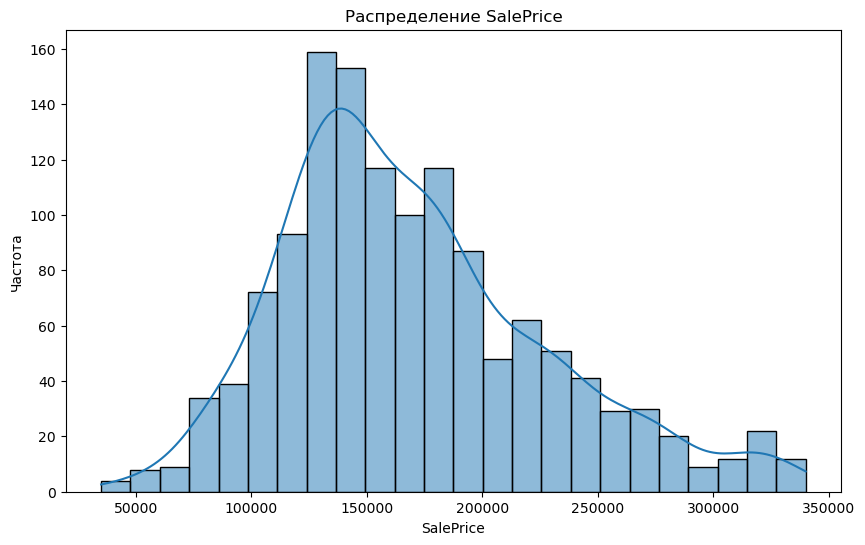

In [73]:
# 7. Разведочный анализ данных (EDA)
# Построим распределение 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Распределение SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Частота")
plt.show()

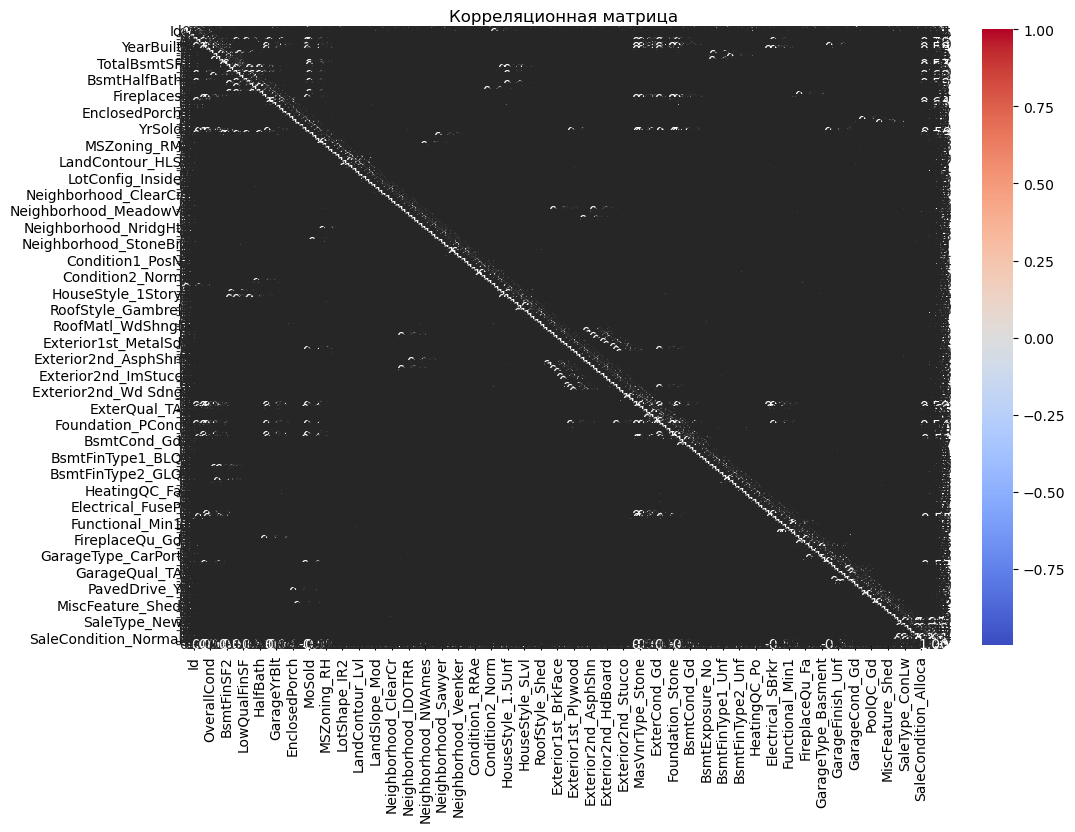

In [74]:
# Корреляционная матрица
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [75]:
# Сохранение данных
df.to_csv('cleaned_house_prices.csv', index=False)

In [76]:
df_cleaned_house_prices = pd.read_csv('cleaned_house_prices.csv')
df_cleaned_house_prices

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,True,False,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,True,False,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,True,False,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,False,False,False,False,False,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,True,False,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,True,False,175000
1324,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,True,False,210000
1325,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,True,False,266500
1326,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,True,False,142125
